<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Project1</h3>
</div>

<img src = "https://www.eesc.europa.eu/sites/default/files/styles/large/public/images/shutterstock_1642888921.jpg?itok=P9-6YhGd" width=50%>

## Importing the libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
#When using the 'inline' backend, your matplotlib graphs will be included in your notebook, next to the code.

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Load and Prepare Data

In [3]:
data1 = pd.read_csv("country_vaccinations.csv")
data2 = pd.read_csv("country_vaccinations_by_manufacturer.csv")


## EDA

In [4]:
data1.head()


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [5]:
data2.head()


,location,date,vaccine,total_vaccinations
0,Austria,2021-01-08,Johnson&Johnson,0
1,Austria,2021-01-08,Moderna,0
2,Austria,2021-01-08,Oxford/AstraZeneca,0
3,Austria,2021-01-08,Pfizer/BioNTech,30974
4,Austria,2021-01-15,Johnson&Johnson,0


In [6]:
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31240 entries, 0 to 31239
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              31240 non-null  object 
 1   iso_code                             31240 non-null  object 
 2   date                                 31240 non-null  object 
 3   total_vaccinations                   17451 non-null  float64
 4   people_vaccinated                    16554 non-null  float64
 5   people_fully_vaccinated              13795 non-null  float64
 6   daily_vaccinations_raw               14421 non-null  float64
 7   daily_vaccinations                   30948 non-null  float64
 8   total_vaccinations_per_hundred       17451 non-null  float64
 9   people_vaccinated_per_hundred        16554 non-null  float64
 10  people_fully_vaccinated_per_hundred  13795 non-null  float64
 11  daily_vaccinations_per_milli

In [7]:
data2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9157 entries, 0 to 9156
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   location            9157 non-null   object
 1   date                9157 non-null   object
 2   vaccine             9157 non-null   object
 3   total_vaccinations  9157 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 286.3+ KB


In [8]:
data1.describe()


,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,1.745100e+04,1.655400e+04,1.379500e+04,1.442100e+04,3.094800e+04,17451.000000,16554.000000,13795.000000,30948.000000
mean,1.200444e+07,5.704551e+06,3.293973e+06,2.273661e+05,1.149718e+05,29.283554,19.181574,12.340698,3426.365969
std,6.622349e+07,2.101612e+07,1.234425e+07,1.258556e+06,8.460548e+05,35.042304,20.734193,15.857682,4572.377684
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.262015e+05,9.999100e+04,4.832450e+04,4.324000e+03,8.520000e+02,2.970000,2.580000,1.320000,412.000000
50%,8.890780e+05,6.450395e+05,3.632100e+05,2.133600e+04,6.471000e+03,14.510000,10.730000,5.560000,1851.000000
75%,4.213660e+06,2.809300e+06,1.635366e+06,9.441700e+04,3.545425e+04,44.460000,30.890000,17.610000,5123.000000
max,1.426347e+09,6.220000e+08,2.232990e+08,2.474100e+07,2.242429e+07,232.350000,116.660000,115.690000,118759.000000


In [9]:
data2.describe()


,total_vaccinations
count,9.157000e+03
mean,6.024868e+06
std,2.115246e+07
min,0.000000e+00
25%,4.064400e+04
50%,3.388750e+05
75%,2.293498e+06
max,1.865092e+08


## Data Preprocessing

In [10]:
data1.isnull().sum()


country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     13789
people_vaccinated                      14686
people_fully_vaccinated                17445
daily_vaccinations_raw                 16819
daily_vaccinations                       292
total_vaccinations_per_hundred         13789
people_vaccinated_per_hundred          14686
people_fully_vaccinated_per_hundred    17445
daily_vaccinations_per_million           292
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [11]:
data2.isnull().sum()


location              0
date                  0
vaccine               0
total_vaccinations    0
dtype: int64

In [12]:
print("The number of countries:", len(np.unique(data1["country"])))


The number of countries: 218


In [13]:
data1 = data1.dropna(subset=["people_fully_vaccinated"])


In [14]:
print("The number of countries:", len(np.unique(data1["country"])))


The number of countries: 205


In [15]:
data1.isnull().sum()


country                                   0
iso_code                                  0
date                                      0
total_vaccinations                       74
people_vaccinated                        25
people_fully_vaccinated                   0
daily_vaccinations_raw                 2008
daily_vaccinations                       73
total_vaccinations_per_hundred           74
people_vaccinated_per_hundred            25
people_fully_vaccinated_per_hundred       0
daily_vaccinations_per_million           73
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [16]:
data1["date"] = pd.to_datetime(data1["date"], format="%Y-%m-%d")
data1.head()


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
78,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,NaN,13921.0,1.30,1.15,0.14,358.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
87,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,NaN,4822.0,1.41,1.21,0.20,124.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
91,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,NaN,5692.0,1.47,1.22,0.25,146.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
93,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,NaN,6768.0,1.52,1.23,0.29,174.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
94,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,2859.0,6487.0,1.52,1.23,0.29,167.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [17]:
data1 = data1.replace([np.inf, -np.inf], np.nan)
data1 = data1.fillna(0)
data1.isnull().sum()


country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

In [18]:
data1["day"] = pd.DatetimeIndex(data1["date"]).day
data1["month"] = pd.DatetimeIndex(data1["date"]).month
data1["year"] = pd.DatetimeIndex(data1["date"]).year
data1["week_of_year"] = pd.DatetimeIndex(data1["date"]).weekofyear
data1["day_of_year"] = pd.DatetimeIndex(data1["date"]).dayofyear
data1["day_of_week"] = pd.DatetimeIndex(data1["date"]).dayofweek


In [19]:
data1.head()


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,...,daily_vaccinations_per_million,vaccines,source_name,source_website,day,month,year,week_of_year,day_of_year,day_of_week
78,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,0.0,13921.0,1.30,1.15,...,358.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,11,5,2021,19,131,1
87,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,0.0,4822.0,1.41,1.21,...,124.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,20,5,2021,20,140,3
91,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,0.0,5692.0,1.47,1.22,...,146.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,24,5,2021,21,144,0
93,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,0.0,6768.0,1.52,1.23,...,174.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,26,5,2021,21,146,2
94,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,2859.0,6487.0,1.52,1.23,...,167.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,27,5,2021,21,147,3


## Strorytelling - Visualization

In [20]:
np.unique(data2["vaccine"])


array(['CanSino', 'Johnson&Johnson', 'Moderna', 'Oxford/AstraZeneca',
       'Pfizer/BioNTech', 'Sinopharm/Beijing', 'Sinovac', 'Sputnik V'],
      dtype=object)

In [21]:
np.unique(data2["location"])


array(['Austria', 'Belgium', 'Bulgaria', 'Chile', 'Croatia', 'Cyprus',
       'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
       'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'United States', 'Uruguay'], dtype=object)

#### Number of Iranian People Vaccinated

In [22]:
data1.query('country == "Iran"')["people_vaccinated"].sum()


33067923.0

In [23]:
def max_total_vaccinated(data):
    return (
        data[["country", "total_vaccinations"]]
        .groupby(by="country")
        .max()
        .sort_values(by="total_vaccinations", ascending=False)
        .reset_index()
    )


max_total_vaccinated(data1)


,country,total_vaccinations
0,China,845299000.0
1,India,391340491.0
2,United States,336054953.0
3,Brazil,120873006.0
4,Germany,84989850.0
...,...,...
200,Saint Helena,7892.0
201,Bonaire Sint Eustatius and Saba,7391.0
202,Falkland Islands,4407.0
203,Montserrat,2695.0


In [24]:
def sum_people_vaccinated(data):
    return (
        data[["country", "people_vaccinated"]]
        .groupby(by="country")
        .sum()
        .sort_values(by="people_vaccinated", ascending=False)
        .reset_index()
    )


sum_people_vaccinated(data1)


,country,people_vaccinated
0,United States,1.981791e+10
1,India,1.832324e+10
2,United Kingdom,5.416602e+09
3,England,4.532966e+09
4,Brazil,4.227510e+09
...,...,...
200,Nauru,1.500100e+04
201,Saint Helena,1.306600e+04
202,Bonaire Sint Eustatius and Saba,5.726000e+03
203,Falkland Islands,5.237000e+03


In [25]:
def sum_people_fully_vaccinated(data):
    return (
        data[["country", "people_fully_vaccinated"]]
        .groupby(by="country")
        .sum()
        .sort_values(by="people_fully_vaccinated", ascending=False)
        .reset_index()
    )


sum_people_fully_vaccinated(data1)


,country,people_fully_vaccinated
0,United States,1.423530e+10
1,India,4.119983e+09
2,United Kingdom,2.426033e+09
3,England,2.010222e+09
4,Germany,1.842758e+09
...,...,...
200,Burkina Faso,3.481000e+03
201,Bhutan,2.869000e+03
202,Bonaire Sint Eustatius and Saba,1.665000e+03
203,Papua New Guinea,7.100000e+02


In [26]:
def avg_total_vaccinated_per_hundred(data):
    return (
        data[["country", "total_vaccinations_per_hundred"]]
        .groupby(by="country")
        .mean()
        .sort_values(by="total_vaccinations_per_hundred", ascending=False)
        .reset_index()
    )


avg_total_vaccinated_per_hundred(data1)


,country,total_vaccinations_per_hundred
0,Gibraltar,149.613511
1,United Arab Emirates,131.112857
2,Falkland Islands,125.310000
3,Israel,100.271813
4,Jersey,98.021200
...,...,...
200,Cameroon,0.310769
201,Benin,0.285000
202,Burkina Faso,0.160000
203,Chad,0.120000


In [27]:
def avg_people_vaccinated_per_hundred(data):
    return (
        data[["country", "people_vaccinated_per_hundred"]]
        .groupby(by="country")
        .mean()
        .sort_values(by="people_vaccinated_per_hundred", ascending=False)
        .reset_index()
    )


avg_people_vaccinated_per_hundred(data1)


,country,people_vaccinated_per_hundred
0,Gibraltar,84.151277
1,Falkland Islands,75.180000
2,Niue,73.180000
3,Saint Helena,71.736667
4,Nauru,69.230000
...,...,...
200,Cameroon,0.260769
201,Benin,0.227500
202,Burkina Faso,0.150000
203,Chad,0.093333


In [28]:
def avg_people_fully_vaccinated(data):
    return (
        data[["country", "people_fully_vaccinated_per_hundred"]]
        .groupby(by="country")
        .mean()
        .sort_values(by="people_fully_vaccinated_per_hundred", ascending=False)
        .reset_index()
    )


avg_people_fully_vaccinated(data1)


,country,people_fully_vaccinated_per_hundred
0,Gibraltar,65.462234
1,United Arab Emirates,56.067143
2,Falkland Islands,50.130000
3,Israel,45.682850
4,Cayman Islands,41.966182
...,...,...
200,South Sudan,0.023333
201,Burkina Faso,0.020000
202,Papua New Guinea,0.010000
203,Uganda,0.006667


In [29]:
def avg_daily_vaccinations(data):
    return (
        data[["country", "daily_vaccinations_per_million"]]
        .groupby(by="country")
        .mean()
        .sort_values(by="daily_vaccinations_per_million", ascending=False)
        .reset_index()
    )


avg_daily_vaccinations(data1)


,country,daily_vaccinations_per_million
0,Niue,45735.000000
1,Falkland Islands,27275.000000
2,Cook Islands,22076.500000
3,Saint Helena,17734.666667
4,Gibraltar,17298.659574
...,...,...
200,Benin,50.500000
201,Burkina Faso,28.000000
202,Democratic Republic of Congo,12.800000
203,Bonaire Sint Eustatius and Saba,0.000000


In [30]:
def min_daily_vaccination_country(data):
    daily_vaccination = data.pivot_table(
        index="country", columns="date", values="daily_vaccinations"
    )
    daily_vaccination.replace(0.00, np.nan, inplace=True)
    daily_vaccination["Min Daily Vaccination"] = daily_vaccination.min(axis=1)
    daily_vaccination["Date - Min Daily Vaccination"] = daily_vaccination.idxmin(axis=1)
    daily_vaccination.sort_values(
        by="Min Daily Vaccination", ascending=True, inplace=True
    )
    daily_vaccination.rename_axis("", axis=1, inplace=True)
    return daily_vaccination[
        ["Min Daily Vaccination", "Date - Min Daily Vaccination"]
    ].reset_index()


min_daily_vaccination_country(data1)


,country,Min Daily Vaccination,Date - Min Daily Vaccination
0,Jamaica,1.0,2021-06-04
1,Liechtenstein,1.0,2021-02-05
2,Montserrat,2.0,2021-06-18
3,Wallis and Futuna,4.0,2021-07-06
4,San Marino,6.0,2021-06-29
...,...,...,...
200,India,309949.0,2021-02-17
201,United States,506771.0,2021-07-11
202,China,17401857.0,2021-06-10
203,Bonaire Sint Eustatius and Saba,NaN,NaT


In [31]:
def max_daily_vaccination_country(data):
    daily_vaccination = data.pivot_table(
        index="country", columns="date", values="daily_vaccinations"
    )
    daily_vaccination["Max Daily Vaccination"] = daily_vaccination.max(axis=1)
    daily_vaccination["Date - Max Daily Vaccination"] = daily_vaccination.idxmax(axis=1)
    daily_vaccination.sort_values(
        by="Max Daily Vaccination", ascending=False, inplace=True
    )
    daily_vaccination.rename_axis("", axis=1, inplace=True)

    return daily_vaccination[
        ["Max Daily Vaccination", "Date - Max Daily Vaccination"]
    ].reset_index()


max_daily_vaccination_country(data1)


,country,Max Daily Vaccination,Date - Max Daily Vaccination
0,China,17401857.0,2021-06-10
1,India,6276153.0,2021-06-26
2,United States,3384387.0,2021-04-13
3,Brazil,1436195.0,2021-06-23
4,Japan,1297162.0,2021-06-30
...,...,...,...
200,Bhutan,133.0,2021-07-12
201,Niue,74.0,2021-07-06
202,Montserrat,53.0,2021-03-17
203,Turkmenistan,0.0,2021-04-04


#### Top and bottom countries based on Total Vaccination

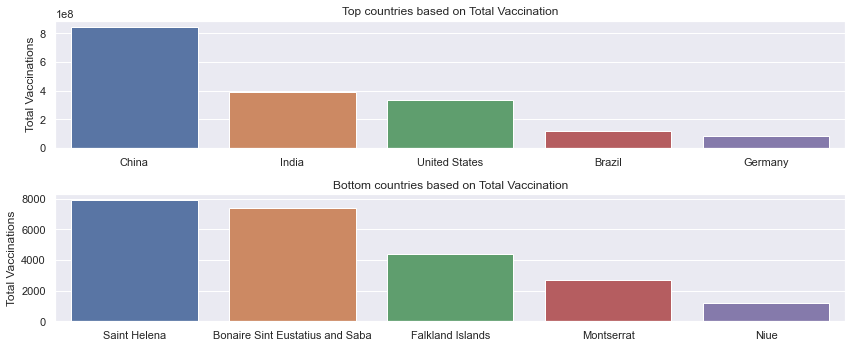

In [32]:
sns.set_theme(style="whitegrid")
sns.set(rc={"figure.figsize": (12, 5)})

fig, axes = plt.subplots(2, 1)

sns.barplot(
    x="country",
    y="total_vaccinations",
    data=max_total_vaccinated(data1).head(),
    ax=axes[0],
)
axes[0].set(
    xlabel="",
    ylabel="Total Vaccinations",
    title="Top countries based on Total Vaccination",
)

sns.barplot(
    x="country",
    y="total_vaccinations",
    data=max_total_vaccinated(data1).tail(),
    ax=axes[1],
)
axes[1].set(
    xlabel="",
    ylabel="Total Vaccinations",
    title="Bottom countries based on Total Vaccination",
)


fig.tight_layout()
plt.show()


#### Top and bottom countries based on People Vaccinated

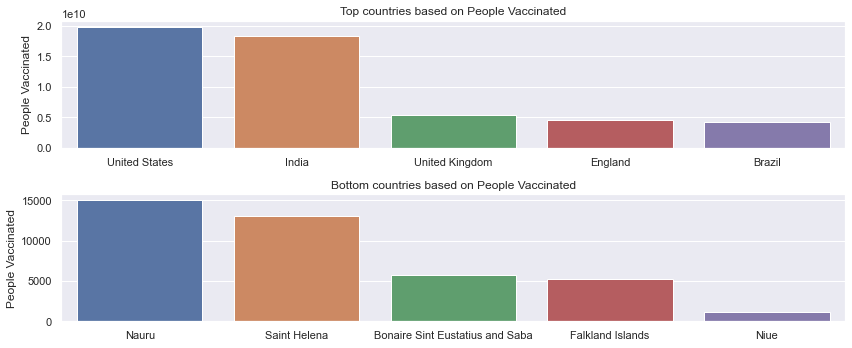

In [33]:
fig, axes = plt.subplots(2, 1)

sns.barplot(
    x="country",
    y="people_vaccinated",
    data=sum_people_vaccinated(data1).head(),
    ax=axes[0],
)
axes[0].set(
    xlabel="",
    ylabel="People Vaccinated",
    title="Top countries based on People Vaccinated",
)

sns.barplot(
    x="country",
    y="people_vaccinated",
    data=sum_people_vaccinated(data1).tail(),
    ax=axes[1],
)
axes[1].set(
    xlabel="",
    ylabel="People Vaccinated",
    title="Bottom countries based on People Vaccinated",
)


fig.tight_layout()
plt.show()


#### Top and bottom baed on People Fully Vaccinated

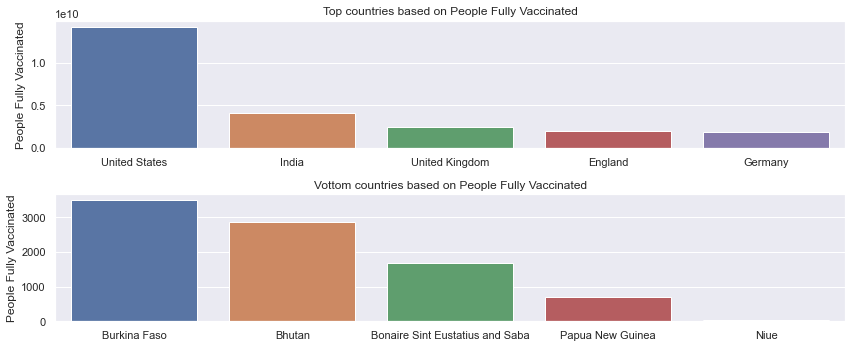

In [34]:
fig, axes = plt.subplots(2, 1)

sns.barplot(
    x="country",
    y="people_fully_vaccinated",
    data=sum_people_fully_vaccinated(data1).head(),
    ax=axes[0],
)
axes[0].set(
    xlabel="",
    ylabel="People Fully Vaccinated",
    title="Top countries based on People Fully Vaccinated",
)

sns.barplot(
    x="country",
    y="people_fully_vaccinated",
    data=sum_people_fully_vaccinated(data1).tail(),
    ax=axes[1],
)
axes[1].set(
    xlabel="",
    ylabel="People Fully Vaccinated",
    title="Vottom countries based on People Fully Vaccinated",
)

fig.tight_layout()
plt.show()


#### Top and bottom countries based on Total Vaccinations Per Hundred

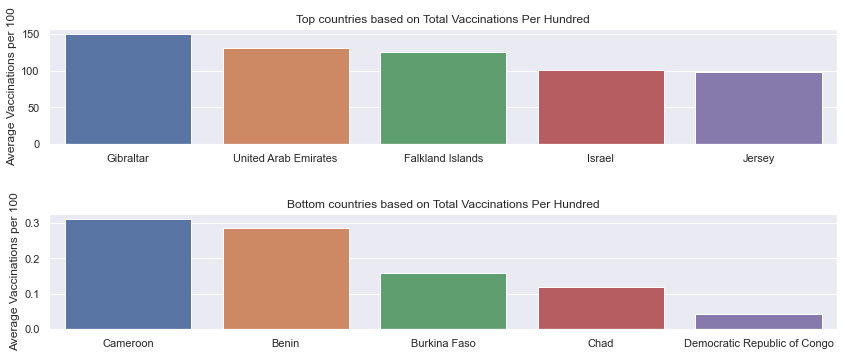

In [35]:
fig, axes = plt.subplots(2, 1)

sns.barplot(
    x="country",
    y="total_vaccinations_per_hundred",
    data=avg_total_vaccinated_per_hundred(data1).head(),
    ax=axes[0],
)
axes[0].set(
    xlabel="",
    ylabel="Average Vaccinations per 100",
    title="Top countries based on Total Vaccinations Per Hundred",
)

sns.barplot(
    x="country",
    y="total_vaccinations_per_hundred",
    data=avg_total_vaccinated_per_hundred(data1).tail(),
    ax=axes[1],
)
axes[1].set(
    xlabel="",
    ylabel="Average Vaccinations per 100",
    title="Bottom countries based on Total Vaccinations Per Hundred",
)

fig.tight_layout(h_pad=3)
plt.show()


#### Top and bottom countries based on People Vaccinated Per Hundred

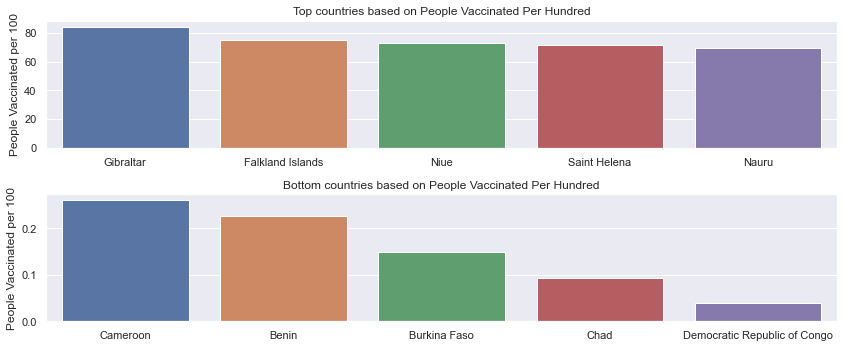

In [36]:
fig, axes = plt.subplots(2, 1)

sns.barplot(
    x="country",
    y="people_vaccinated_per_hundred",
    data=avg_people_vaccinated_per_hundred(data1).head(),
    ax=axes[0],
)
axes[0].set(
    xlabel="",
    ylabel="People Vaccinated per 100",
    title="Top countries based on People Vaccinated Per Hundred",
)

sns.barplot(
    x="country",
    y="people_vaccinated_per_hundred",
    data=avg_people_vaccinated_per_hundred(data1).tail(),
    ax=axes[1],
)
axes[1].set(
    xlabel="",
    ylabel="People Vaccinated per 100",
    title="Bottom countries based on People Vaccinated Per Hundred",
)

fig.tight_layout()
plt.show()


#### Top and bottom countries based on People Fully Vaccinated Per Hundred

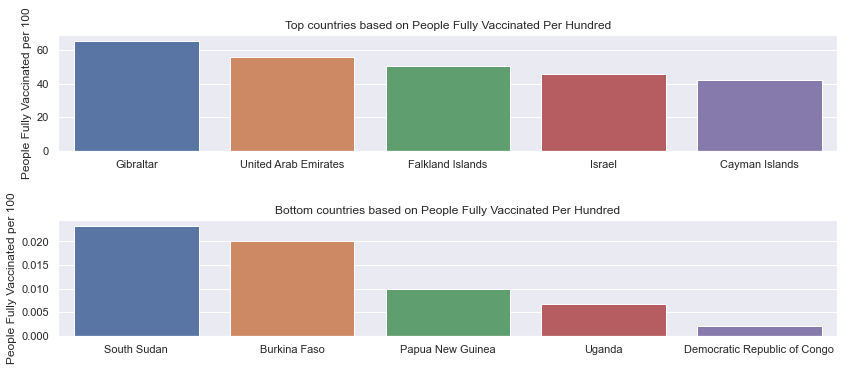

In [37]:
fig, axes = plt.subplots(2, 1)

sns.barplot(
    x="country",
    y="people_fully_vaccinated_per_hundred",
    data=avg_people_fully_vaccinated(data1).head(),
    ax=axes[0],
)
axes[0].set(
    xlabel="",
    ylabel="People Fully Vaccinated per 100",
    title="Top countries based on People Fully Vaccinated Per Hundred",
)

sns.barplot(
    x="country",
    y="people_fully_vaccinated_per_hundred",
    data=avg_people_fully_vaccinated(data1).tail(),
    ax=axes[1],
)
axes[1].set(
    xlabel="",
    ylabel="People Fully Vaccinated per 100",
    title="Bottom countries based on People Fully Vaccinated Per Hundred",
)

fig.tight_layout(h_pad=3)
plt.show()


#### Top and bottom Daily Vaccination based on Country

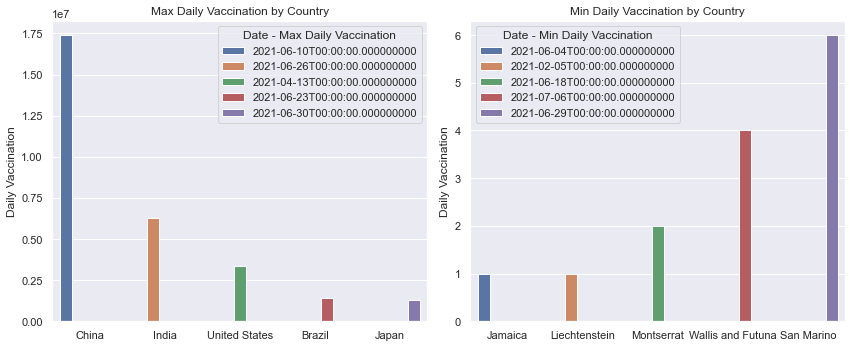

In [38]:
fig, axes = plt.subplots(1, 2)

sns.barplot(
    data=max_daily_vaccination_country(data1).head(),
    x="country",
    y="Max Daily Vaccination",
    ax=axes[0],
    hue="Date - Max Daily Vaccination",
)
axes[0].set(
    xlabel="", ylabel="Daily Vaccination", title="Max Daily Vaccination by Country"
)

sns.barplot(
    data=min_daily_vaccination_country(data1).head(),
    x="country",
    y="Min Daily Vaccination",
    ax=axes[1],
    hue="Date - Min Daily Vaccination",
)
axes[1].set(
    xlabel="", ylabel="Daily Vaccination", title="Min Daily Vaccination by Country"
)


# plt.ticklabel_format(style='plain', axis='y')
fig.tight_layout()
plt.show()


#### Top and bottom Daily Vaccination based on Country Per Million

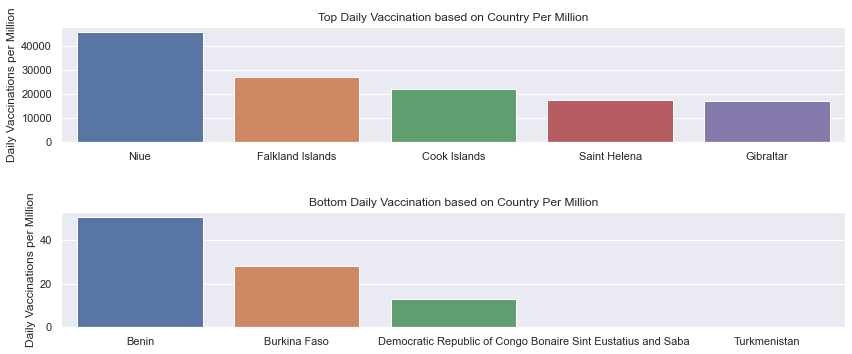

In [39]:
fig, axes = plt.subplots(2, 1)

sns.barplot(
    x="country",
    y="daily_vaccinations_per_million",
    data=avg_daily_vaccinations(data1).head(),
    ax=axes[0],
)
axes[0].set(
    xlabel="",
    ylabel="Daily Vaccinations per Million",
    title="Top Daily Vaccination based on Country Per Million",
)

sns.barplot(
    x="country",
    y="daily_vaccinations_per_million",
    data=avg_daily_vaccinations(data1).tail(),
    ax=axes[1],
)
axes[1].set(
    xlabel="",
    ylabel="Daily Vaccinations per Million",
    title="Bottom Daily Vaccination based on Country Per Million",
)

fig.tight_layout(h_pad=3)
plt.show()


#### Evolution of Total Vaccinations

<AxesSubplot:xlabel='month', ylabel='total_vaccinations'>

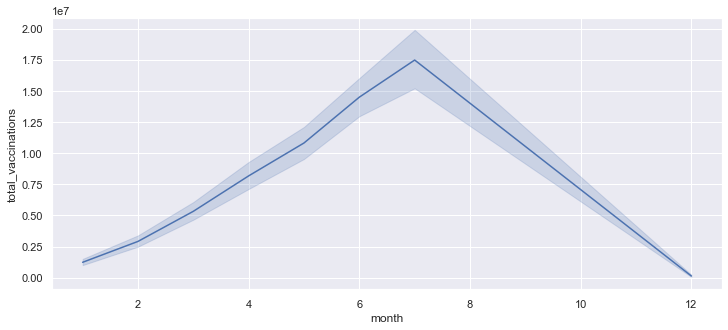

In [40]:
sns.lineplot(x="month", y="total_vaccinations", data=data1)


<AxesSubplot:xlabel='day_of_year', ylabel='total_vaccinations'>

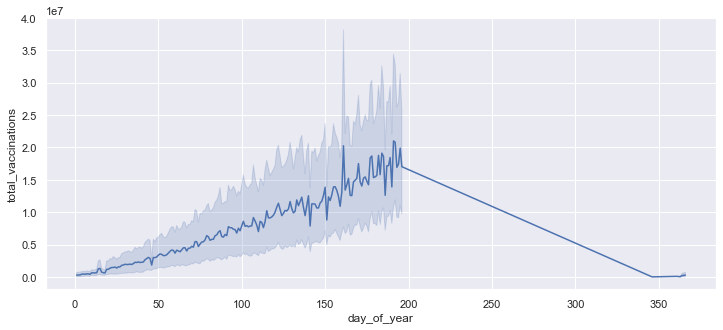

In [41]:
sns.lineplot(x="day_of_year", y="total_vaccinations", data=data1)


<AxesSubplot:xlabel='day', ylabel='total_vaccinations'>

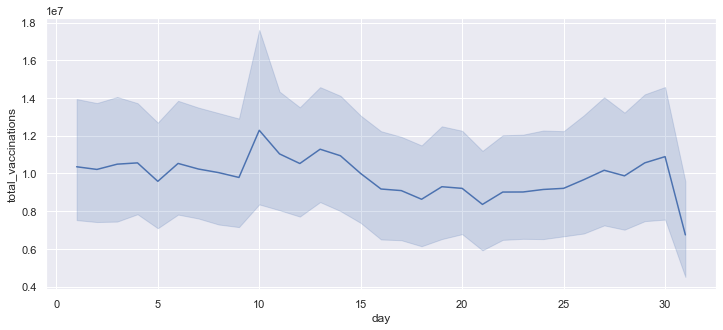

In [42]:
sns.lineplot(x="day", y="total_vaccinations", data=data1)


<AxesSubplot:xlabel='date', ylabel='total_vaccinations'>

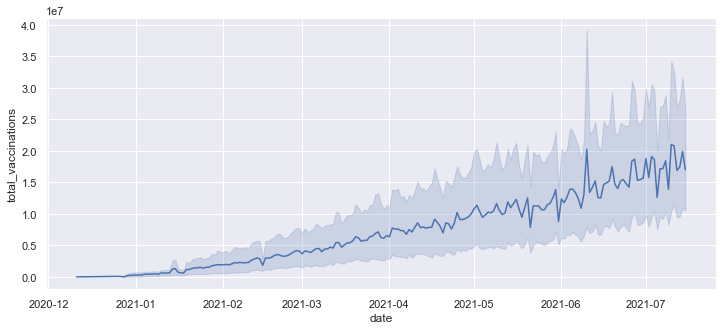

In [43]:
sns.lineplot(x="date", y="total_vaccinations", data=data1)


#### Share of each vaccine

([<matplotlib.patches.Wedge at 0x24a412f2470>,
 [Text(4.399998972629208, 0.003006802606813077, 'CanSino'),
  Text(4.387824706647139, 0.3270998987113102, 'Johnson&Johnson'),
  Text(2.1345579884635764, 3.847552753879579, 'Moderna'),
  Text(-2.359968135883362, 3.7135630326702698, 'Oxford/AstraZeneca'),
  Text(-2.2548666274654443, -3.7783033880754755, 'Pfizer/BioNTech'),
  Text(4.288496449983644, -0.9842754687980793, 'Sinopharm/Beijing'),
  Text(4.371754080214439, -0.497761250127414, 'Sinovac'),
  Text(4.3999958530791785, -0.006040934202269656, 'Sputnik V')],
 [Text(2.3999994396159314, 0.0016400741491707693, '0.0%'),
  Text(2.3933589308984393, 0.17841812656980552, '2.3%'),
  Text(1.1643043573437688, 2.0986651384797703, '29.2%'),
  Text(-1.2872553468454702, 2.025579836001965, '5.0%'),
  Text(-1.2299272513447876, -2.0608927571320774, '59.9%'),
  Text(2.3391798818092604, -0.5368775284353159, '0.1%'),
  Text(2.384593134662421, -0.27150613643313487, '3.5%'),
  Text(2.399997738043188, -0.0032950

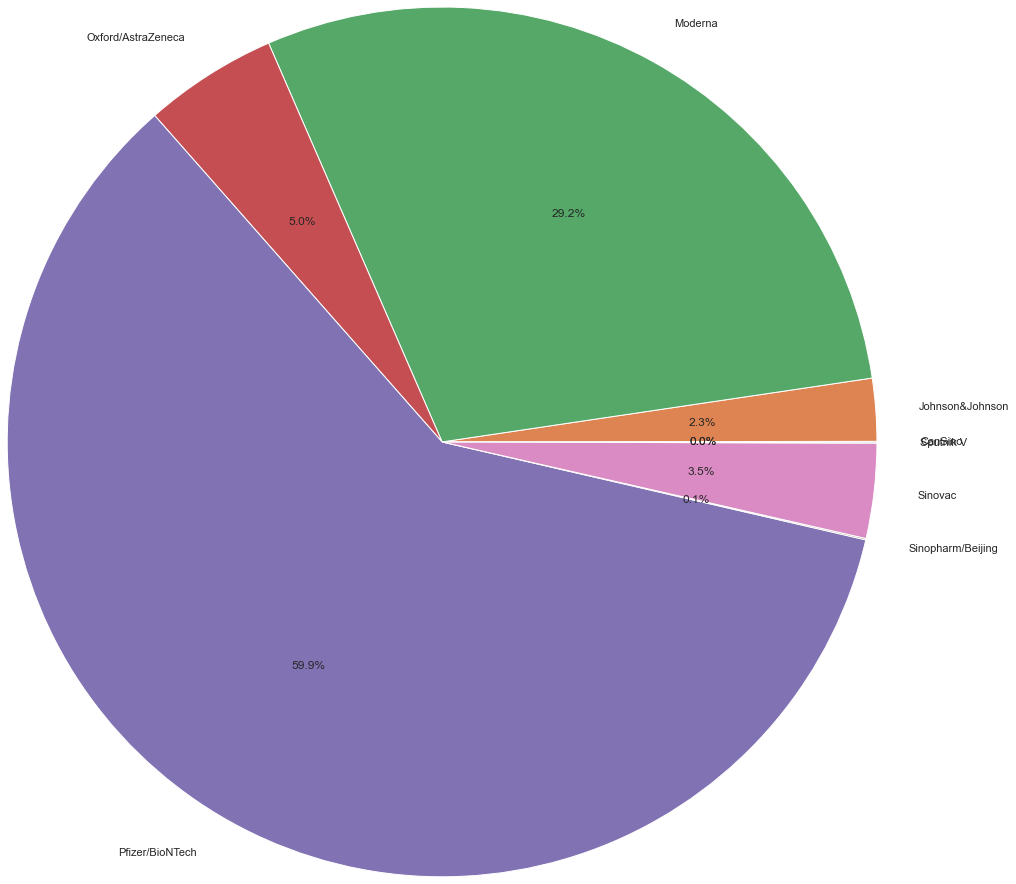

In [44]:
shares = data2.groupby(["vaccine"])["total_vaccinations"].sum()
plt.pie(shares, labels=shares.index, autopct="%1.1f%%", radius=4)


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

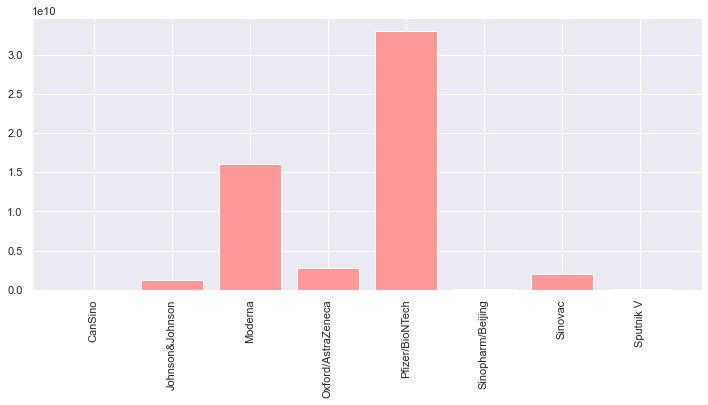

In [45]:
plt.bar(shares.index, shares, color="#ff9999")
plt.xticks(rotation=90)


#### Correlation Heatmap

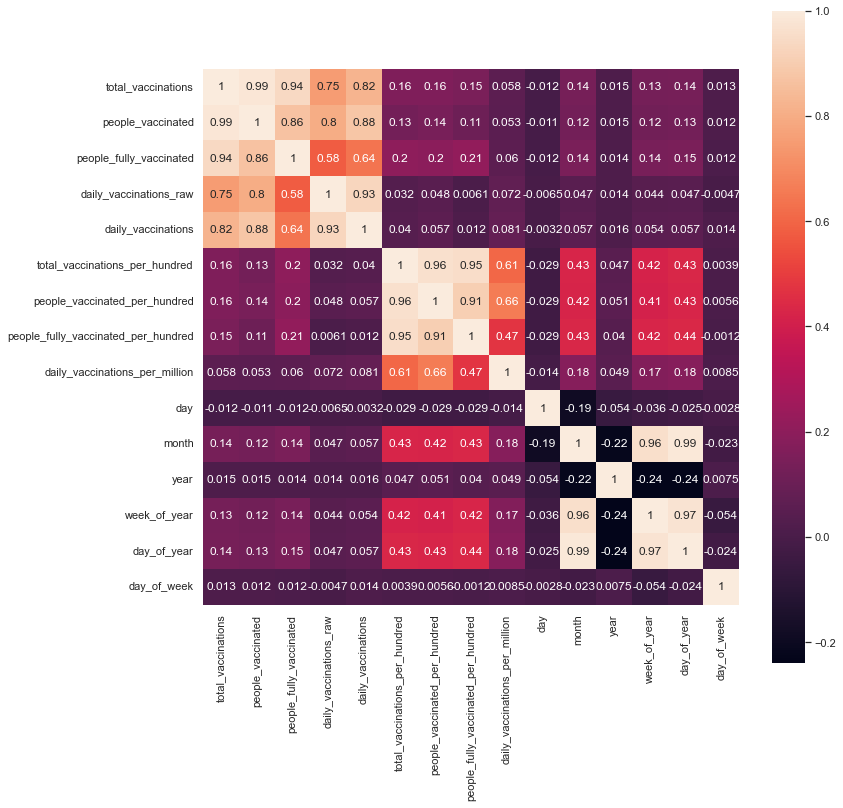

In [46]:
plt.subplots(figsize=(12, 12))
sns.heatmap(data1.corr(), annot=True, square=True)
plt.show()


## Prepare Data for Machine learning

In [47]:
data1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13795 entries, 78 to 31239
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              13795 non-null  object        
 1   iso_code                             13795 non-null  object        
 2   date                                 13795 non-null  datetime64[ns]
 3   total_vaccinations                   13795 non-null  float64       
 4   people_vaccinated                    13795 non-null  float64       
 5   people_fully_vaccinated              13795 non-null  float64       
 6   daily_vaccinations_raw               13795 non-null  float64       
 7   daily_vaccinations                   13795 non-null  float64       
 8   total_vaccinations_per_hundred       13795 non-null  float64       
 9   people_vaccinated_per_hundred        13795 non-null  float64       
 10  people_fu

In [48]:
data1.drop(['country','iso_code','date','source_name','source_website','day','year','week_of_year','day_of_year','day_of_week'],axis=1,inplace=True)

In [49]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13795 entries, 78 to 31239
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   total_vaccinations                   13795 non-null  float64
 1   people_vaccinated                    13795 non-null  float64
 2   people_fully_vaccinated              13795 non-null  float64
 3   daily_vaccinations_raw               13795 non-null  float64
 4   daily_vaccinations                   13795 non-null  float64
 5   total_vaccinations_per_hundred       13795 non-null  float64
 6   people_vaccinated_per_hundred        13795 non-null  float64
 7   people_fully_vaccinated_per_hundred  13795 non-null  float64
 8   daily_vaccinations_per_million       13795 non-null  float64
 9   vaccines                             13795 non-null  object 
 10  month                                13795 non-null  int64  
dtypes: float64(9), int64(1), ob

In [50]:
# One-hot encoding
data1 = pd.get_dummies(data1, columns=["vaccines"])

In [51]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13795 entries, 78 to 31239
Data columns (total 60 columns):
 #   Column                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                --------------  -----  
 0   total_vaccinations                                                                                    13795 non-null  float64
 1   people_vaccinated                                                                                     13795 non-null  float64
 2   people_fully_vaccinated                                                                               13795 non-null  float64
 3   daily_vaccinations_raw                                                                                13795 non-null  float64
 4   daily_vaccinations                                                                                 

In [52]:
data1.head()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,month,...,"vaccines_Oxford/AstraZeneca, Sinovac, Sputnik V","vaccines_Oxford/AstraZeneca, Sputnik V",vaccines_Pfizer/BioNTech,"vaccines_Pfizer/BioNTech, Sinopharm/Beijing","vaccines_Pfizer/BioNTech, Sinovac","vaccines_Pfizer/BioNTech, Sputnik V","vaccines_QazVac, Sinopharm/HayatVax, Sputnik V",vaccines_Sinopharm/Beijing,"vaccines_Sinopharm/Beijing, Sputnik V",vaccines_Sputnik V
78,504502.0,448878.0,55624.0,0.0,13921.0,1.30,1.15,0.14,358.0,5,...,0,0,0,0,0,0,0,0,0,0
87,547901.0,470341.0,77560.0,0.0,4822.0,1.41,1.21,0.20,124.0,5,...,0,0,0,0,0,0,0,0,0,0
91,573277.0,476367.0,96910.0,0.0,5692.0,1.47,1.22,0.25,146.0,5,...,0,0,0,0,0,0,0,0,0,0
93,590454.0,479372.0,111082.0,0.0,6768.0,1.52,1.23,0.29,174.0,5,...,0,0,0,0,0,0,0,0,0,0
94,593313.0,479574.0,113739.0,2859.0,6487.0,1.52,1.23,0.29,167.0,5,...,0,0,0,0,0,0,0,0,0,0


In [53]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

columns = data1.columns
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data1)
data1 = pd.DataFrame(scaled_features, columns=columns)

In [54]:
data1.head()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,month,...,"vaccines_Oxford/AstraZeneca, Sinovac, Sputnik V","vaccines_Oxford/AstraZeneca, Sputnik V",vaccines_Pfizer/BioNTech,"vaccines_Pfizer/BioNTech, Sinopharm/Beijing","vaccines_Pfizer/BioNTech, Sinovac","vaccines_Pfizer/BioNTech, Sputnik V","vaccines_QazVac, Sinopharm/HayatVax, Sputnik V",vaccines_Sinopharm/Beijing,"vaccines_Sinopharm/Beijing, Sputnik V",vaccines_Sputnik V
0,-0.280867,-0.276667,-0.262346,-0.297287,-0.295437,-0.910600,-0.994092,-0.769415,-1.023202,0.264757,...,-0.088414,-0.067733,-0.165321,-0.084151,-0.146021,-0.064413,-0.07443,-0.108326,-0.070383,-0.062688
1,-0.279576,-0.275729,-0.260569,-0.297287,-0.317412,-0.907521,-0.991233,-0.765631,-1.081840,0.264757,...,-0.088414,-0.067733,-0.165321,-0.084151,-0.146021,-0.064413,-0.07443,-0.108326,-0.070383,-0.062688
2,-0.278822,-0.275465,-0.259002,-0.297287,-0.315311,-0.905841,-0.990757,-0.762478,-1.076327,0.264757,...,-0.088414,-0.067733,-0.165321,-0.084151,-0.146021,-0.064413,-0.07443,-0.108326,-0.070383,-0.062688
3,-0.278311,-0.275334,-0.257853,-0.297287,-0.312712,-0.904441,-0.990280,-0.759956,-1.069310,0.264757,...,-0.088414,-0.067733,-0.165321,-0.084151,-0.146021,-0.064413,-0.07443,-0.108326,-0.070383,-0.062688
4,-0.278226,-0.275325,-0.257638,-0.291019,-0.313391,-0.904441,-0.990280,-0.759956,-1.071065,0.264757,...,-0.088414,-0.067733,-0.165321,-0.084151,-0.146021,-0.064413,-0.07443,-0.108326,-0.070383,-0.062688


## Train your model

In [55]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(
    data1.drop(["total_vaccinations"], axis=1),
    data1["total_vaccinations"],
    test_size=0.2,
    random_state=0,
)


#### Multiple Regression

In [56]:
from sklearn.linear_model import LinearRegression

model_mlr = LinearRegression()
model_mlr.fit(X_train, y_train)

predict_mlr = model_mlr.predict(X_test)


<AxesSubplot:xlabel='total_vaccinations', ylabel='Count'>

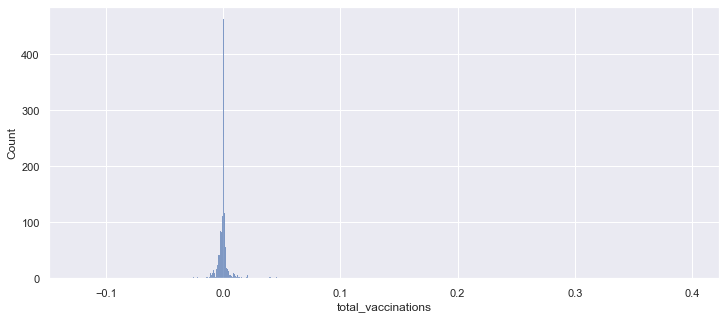

In [57]:
sns.histplot(y_test - predict_mlr)


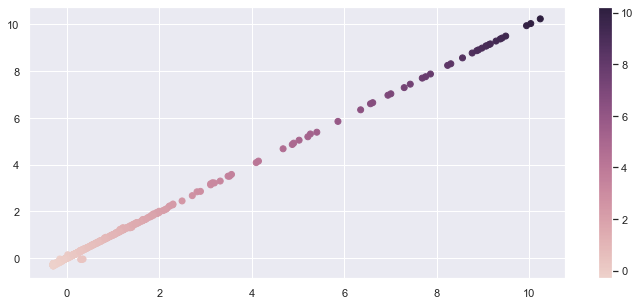

In [58]:
map = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(y_test, predict_mlr, c=y_test, cmap=map)
f.colorbar(points)
plt.show()


In [59]:
print("R2 Score:", metrics.r2_score(y_test, predict_mlr))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, predict_mlr))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, predict_mlr))
print(
    "Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, predict_mlr))
)


R2 Score: 0.9997184975158925
Mean Absolute Error: 0.004221056916483675
Mean Squared Error: 0.00028858109651143176
Root Mean Squared Error: 0.01698767484123215


#### RandomForest Regression

In [60]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
predict_rf = model_rf.predict(X_test)

<AxesSubplot:xlabel='total_vaccinations', ylabel='Count'>

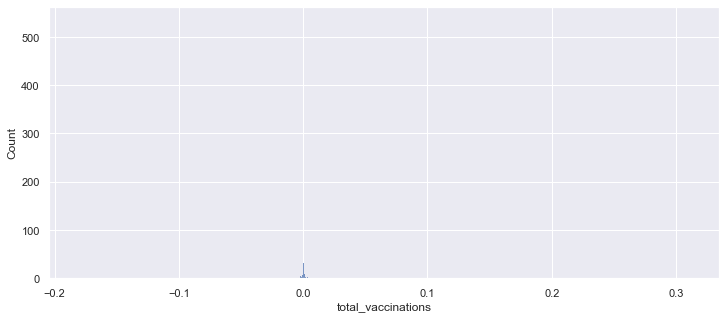

In [61]:
sns.histplot(y_test - predict_rf)

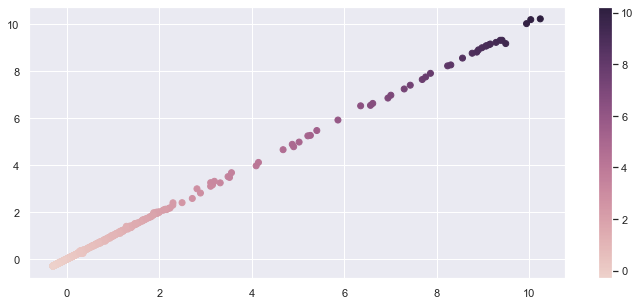

In [62]:
map = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(y_test, predict_rf, c=y_test, cmap=map)
f.colorbar(points)
plt.show()

In [63]:
print("R2 Score:", metrics.r2_score(y_test, predict_rf))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, predict_rf))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, predict_rf))
print(
    "Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, predict_rf))
)

R2 Score: 0.9998212858220835
Mean Absolute Error: 0.002878149866486095
Mean Squared Error: 0.0001832080934873246
Root Mean Squared Error: 0.013535438429815437


#### KNN Regression

In [64]:
from sklearn.neighbors import KNeighborsRegressor

model_knn = KNeighborsRegressor(n_neighbors=2)
model_knn.fit(X_train, y_train)
predict_knn = model_knn.predict(X_test)

<AxesSubplot:xlabel='total_vaccinations', ylabel='Count'>

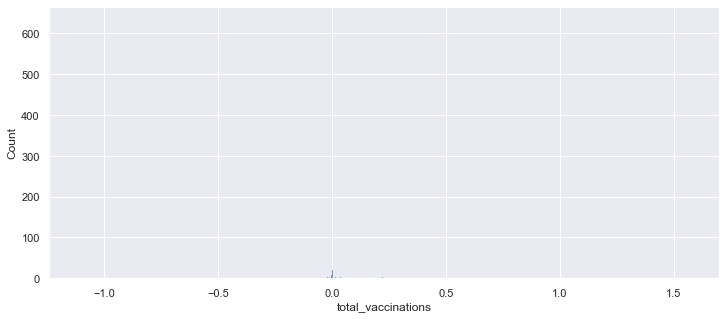

In [65]:
sns.histplot(y_test - predict_knn)

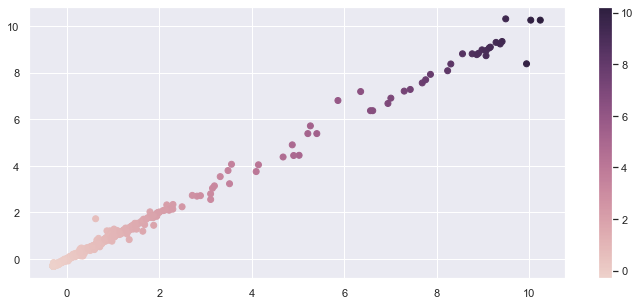

In [66]:
map = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(y_test, predict_knn, c=y_test, cmap=map)
f.colorbar(points)
plt.show()

In [67]:
print("R2 Score:", metrics.r2_score(y_test, predict_knn))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, predict_knn))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, predict_knn))
print(
    "Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, predict_knn))
)

R2 Score: 0.9961880436701821
Mean Absolute Error: 0.012856464768987825
Mean Squared Error: 0.0039078111193227875
Root Mean Squared Error: 0.06251248770703968


#### Decision Tree Regressor

In [68]:
from sklearn.tree import DecisionTreeRegressor

model_tree = DecisionTreeRegressor()
model_tree.fit(X_train, y_train)
predict_tree = model_tree.predict(X_test)

<AxesSubplot:xlabel='total_vaccinations', ylabel='Count'>

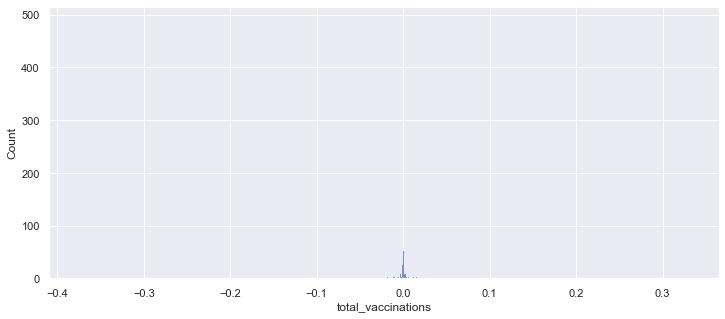

In [69]:
sns.histplot(y_test - predict_tree)

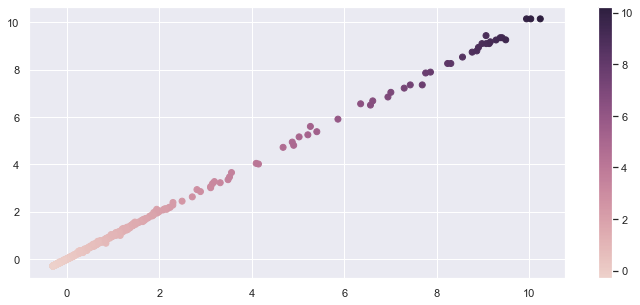

In [70]:
map = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(y_test, predict_tree, c=y_test, cmap=map)
f.colorbar(points)
plt.show()

In [71]:
print("R2 Score:", metrics.r2_score(y_test, predict_tree))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, predict_tree))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, predict_tree))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, predict_tree)))

R2 Score: 0.9996193196888143
Mean Absolute Error: 0.004958949634928934
Mean Squared Error: 0.0003902528319440674
Root Mean Squared Error: 0.01975481794256954


#### SVM Regression

In [72]:
from sklearn.svm import SVR

model_svm = SVR(kernel="rbf")
model_svm.fit(X_train, y_train)
predict_svm = model_svm.predict(X_test)

<AxesSubplot:xlabel='total_vaccinations', ylabel='Count'>

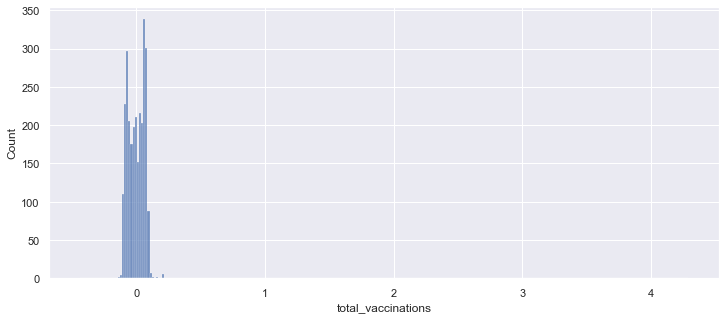

In [73]:
sns.histplot(y_test - predict_svm)

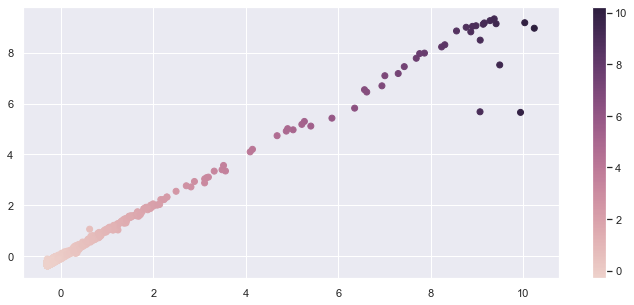

In [74]:
map = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(y_test, predict_svm, c=y_test, cmap=map)
f.colorbar(points)
plt.show()

In [75]:
print("R2 Score:", metrics.r2_score(y_test, predict_svm))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, predict_svm))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, predict_svm))
print(
    "Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, predict_svm))
)

R2 Score: 0.9831051493482267
Mean Absolute Error: 0.05899584283624785
Mean Squared Error: 0.017319685621753338
Root Mean Squared Error: 0.1316042766089056


## Test the model and show the metrics

## Save your final model

## Send us the Result (Maktabkhoone)